In [2]:
from understatapi import UnderstatClient
import pandas as pd

understat = UnderstatClient()

#player_shot_data = understat.player(player='8260').get_shot_data()


In [3]:
league_2022 = understat.league(league="EPL").get_player_data(season="2022")
league_2023 = understat.league(league="EPL").get_player_data(season="2023")
league_2024 = understat.league(league="EPL").get_player_data(season="2024")

league_2022_df = pd.DataFrame(league_2022)
league_2023_df = pd.DataFrame(league_2023)
league_2024_df = pd.DataFrame(league_2024)

league_data = pd.concat([league_2022_df, league_2023_df, league_2024_df])

league_data['time'] = pd.to_numeric(league_data['time'])
league_data['goals'] = pd.to_numeric(league_data['goals'])

league_data = league_data.groupby('id').agg({
    'time': 'sum',
    'goals': 'sum',
    'player_name': 'first',
    'position': 'first'
}).reset_index()

league_data = league_data[league_data["position"].str.contains('F')]
league_data = league_data[league_data["time"] > 1000]
league_data = league_data[league_data["goals"] > 10]

In [4]:
league_data

,id,time,goals,player_name,position
6,10048,3548,20,Nicolas Jackson,F M S
18,10177,2395,13,Evan Ferguson,F S
33,10408,4252,17,Luis Díaz,F M S
52,10720,4017,21,Darwin Núñez,F S
73,10760,6006,16,Brennan Johnson,F M S
90,10846,4098,20,Julián Álvarez,F M S
105,11055,2474,11,Rasmus Højlund,F S
127,11296,3409,15,Cody Gakpo,F M S
140,11363,3171,12,Antoine Semenyo,F M S
174,11717,2879,11,Carlton Morris,F M S


In [5]:
unique_ids = league_data['id'].unique()
shot_df = pd.DataFrame()

# Loop through each ID
for player_id in unique_ids:
    try:
        # Get shot data for current player
        player_shot_data = understat.player(player=str(player_id)).get_shot_data()
        
        # Convert to DataFrame
        player_df = pd.DataFrame(player_shot_data)
        
        # Append to main DataFrame
        shot_df = pd.concat([shot_df, player_df], ignore_index=True)
        
        # Print progress
        print(f"Processed player ID: {player_id}")
        
        
    except Exception as e:
        print(f"Error processing player ID {player_id}: {e}")
        continue

# Now shot_df contains all the shot data
print("\nFinal DataFrame shape:", shot_df.shape)
print("\nFirst few rows:")
print(shot_df.head())


Processed player ID: 10048
Processed player ID: 10177
Processed player ID: 10408
Processed player ID: 10720
Processed player ID: 10760
Processed player ID: 10846
Processed player ID: 11055
Processed player ID: 11296
Processed player ID: 11363
Processed player ID: 11717
Processed player ID: 1250
Processed player ID: 1679
Processed player ID: 1776
Processed player ID: 2381
Processed player ID: 239
Processed player ID: 3697
Processed player ID: 4105
Processed player ID: 4456
Processed player ID: 453
Processed player ID: 468
Processed player ID: 482
Processed player ID: 501
Processed player ID: 5220
Processed player ID: 5221
Processed player ID: 5232
Processed player ID: 531
Processed player ID: 5543
Processed player ID: 5555
Processed player ID: 556
Processed player ID: 5735
Processed player ID: 5786
Processed player ID: 6026
Processed player ID: 6055
Processed player ID: 618
Processed player ID: 647
Processed player ID: 6552
Processed player ID: 6681
Processed player ID: 6691
Processed p

In [6]:
#shot_df = shot_df[shot_df["date"] > '2022-07-01']
print(shot_df.shape)

(19707, 20)


In [7]:
# First filter for goals and select columns
shot_df = shot_df[["id", "player", "result", "xG"]]
shot_df = shot_df[shot_df["result"] == "Goal"]

# Convert xG to numeric if it's not already
shot_df['xG'] = pd.to_numeric(shot_df['xG'])

# Create new DataFrame with the counts, grouping just by player and id
analysis_df = shot_df.groupby(['player']).agg({
    'result': 'count',  # Total goals
    'xG': lambda x: [sum(x > 0.3), sum(x <= 0.3)],  # Goals by xG threshold
    'id': 'first'  # Keep one ID for reference
}).reset_index()

# Rename and split the xG column into two
analysis_df = analysis_df.assign(
    total_goals=analysis_df['result'],
    high_xg_goals=analysis_df['xG'].str[0],
    low_xg_goals=analysis_df['xG'].str[1]
).drop(['result', 'xG'], axis=1)

# Reorder columns
analysis_df = analysis_df[['id', 'player', 'total_goals', 'high_xg_goals', 'low_xg_goals']]
analysis_df["low_chance_%"] = analysis_df["low_xg_goals"] /  analysis_df["total_goals"]
analysis_df["high_chance_%"] = analysis_df["high_xg_goals"] /  analysis_df["total_goals"]

# Sort by total goals descending
analysis_df = analysis_df.sort_values('low_chance_%', ascending=False)

analysis_df.to_csv("small-chance-forwards.csv")

In [15]:
df = pd.read_csv("small-chance-forwards_filtered.csv")
df.tail()

,player,total_goals,high_xg_goals,low_xg_goals,low_chance_%,high_chance_%,position
28,Nicolas Jackson,32,25,7,0.218750,0.781250,F
29,Ivan Toney,36,29,7,0.194444,0.805556,F
30,Gabriel Jesus,73,59,14,0.191781,0.808219,F
31,Carlton Morris,11,9,2,0.181818,0.818182,F
32,Julián Álvarez,23,19,4,0.173913,0.826087,F


C:\Users\Owner\AppData\Local\Temp\ipykernel_13508\3188893344.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_df["low_chance_%"], y=low_df["player"], ax=ax, palette=colours)
C:\Users\Owner\AppData\Local\Temp\ipykernel_13508\3188893344.py:30: UserWarning: The palette list has more values (33) than needed (10), which may not be intended.
  sns.barplot(x=low_df["low_chance_%"], y=low_df["player"], ax=ax, palette=colours)


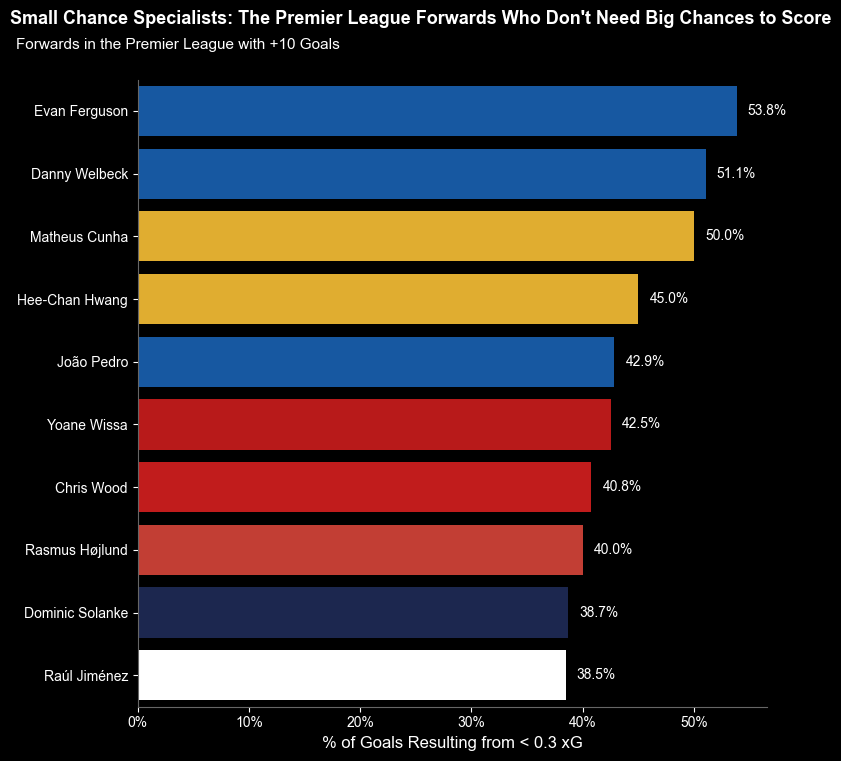

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

player_colours = {
    "Evan Ferguson": "#0057B8",
    "Danny Welbeck": "#0057B8",
    "Matheus Cunha": "#FDB913",
    "Hee-Chan Hwang": "#FDB913",
    "João Pedro": "#0057B8",
    "Yoane Wissa": "#D20000",
    "Chris Wood": "#DD0000",
    "Rasmus Højlund": "#DA291C",
    "Dominic Solanke": "#132257",
    "Raúl Jiménez": "#FFFFFF"
}

colours = [player_colours.get(player, '#4A90E2') for player in df['player']]

low_df = df.head(10)

# Create bar plot
sns.barplot(x=low_df["low_chance_%"], y=low_df["player"], ax=ax, palette=colours)

for i, v in enumerate(low_df["low_chance_%"]):
    ax.text(v + 0.01, i, f'{v:.1%}', va='center', color='white')

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.tick_params(colors='#ffffff')

# Add labels
plt.xlabel(f'% of Goals Resulting from < 0.3 xG', color='white', fontsize=12)
plt.ylabel("")
plt.title("Small Chance Specialists: The Premier League Forwards Who Don't Need Big Chances to Score", color='white', fontsize=13, fontdict={"weight":"bold"}, pad=40, x=0.45)
plt.suptitle('Forwards in the Premier League with +10 Goals', color='white', fontsize=11, x=.22, y=0.91)

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

                   player  total_goals  high_xg_goals  low_xg_goals  \
32         Julián Álvarez           23             19             4   
31         Carlton Morris           11              9             2   
30          Gabriel Jesus           73             59            14   
29             Ivan Toney           36             29             7   
28        Nicolas Jackson           32             25             7   
27          Callum Wilson           88             68            20   
26          Taiwo Awoniyi           37             28             9   
25  Dominic Calvert-Lewin           56             42            14   
24         Erling Haaland          136            101            35   
23    Aleksandar Mitrovic           38             28            10   

    low_chance_%  high_chance_% position  
32      0.173913       0.826087        F  
31      0.181818       0.818182        F  
30      0.191781       0.808219        F  
29      0.194444       0.805556        F  
28 

C:\Users\Owner\AppData\Local\Temp\ipykernel_13508\1438287332.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_df["high_chance_%"], y=high_df["player"], ax=ax, palette=colours)


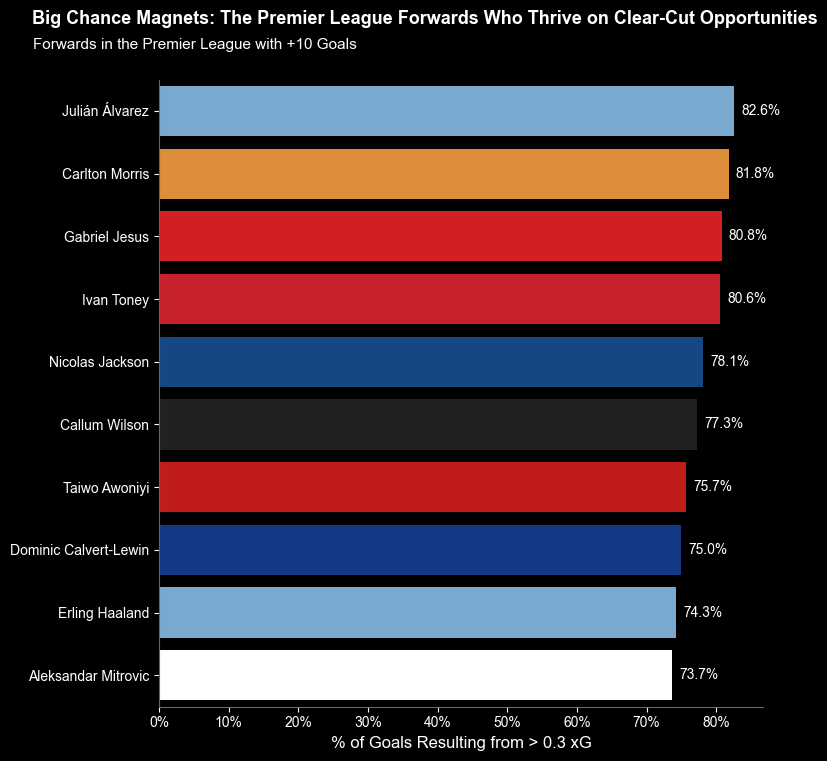

In [36]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Style Configuration
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'

# Data and Color Setup
player_colours = {
    "Julián Álvarez": "#6CABDD",
    "Carlton Morris": "#F78F1E",
    "Gabriel Jesus": "#EF0107",
    "Ivan Toney": "#e30613",
    "Nicolas Jackson": "#034694",
    "Callum Wilson": "#241F20",
    "Taiwo Awoniyi": "#DD0000",
    "Dominic Calvert-Lewin": "#003399",
    "Erling Haaland": "#6CABDD",
    "Aleksandar Mitrovic": "#FFFFFF"
}

# Sort dataframe by high_chance_% in descending order
df_sorted = df.sort_values('high_chance_%', ascending=False)
high_df = df_sorted.head(10)
print(high_df)

colours = [player_colours.get(player, '#4A90E2') for player in high_df['player']]

# Create Plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=high_df["high_chance_%"], y=high_df["player"], ax=ax, palette=colours)

# Add Value Labels
for i, v in enumerate(high_df["high_chance_%"]):
    ax.text(v + 0.01, i, f'{v:.1%}', va='center', color='white')

# Format Axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Customize Spines and Ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.tick_params(colors='#ffffff')

# Add Titles and Labels
plt.xlabel(f'% of Goals Resulting from > 0.3 xG', color='white', fontsize=12)
plt.ylabel("")
plt.title("Big Chance Magnets: The Premier League Forwards Who Thrive on Clear-Cut Opportunities", 
          color='white', fontsize=13, fontdict={"weight":"bold"}, pad=40, x=0.44)
plt.suptitle('Forwards in the Premier League with +10 Goals', 
            color='white', fontsize=11, x=.25, y=0.91)

# Final Layout and Display
plt.tight_layout()
plt.show()